In [28]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

beauty = pd.read_csv("All_Beauty_5.csv")
fashion = pd.read_csv("AMAZON_FASHION_5.csv")
appliances = pd.read_csv("Appliances_5.csv")
industrial_and_scientific = pd.read_csv("Industrial_and_Scientific_5.csv")
luxury_beauty = pd.read_csv("Luxury_Beauty_5.csv")

/var/folders/8w/29spy7853c158mzf537dcy800000gn/T/ipykernel_27256/378806864.py:10: DtypeWarning: Columns (10,25,26,27,28,30,34,35,37,38,46) have mixed types. Specify dtype option on import or set low_memory=False.
  industrial_and_scientific = pd.read_csv("Industrial_and_Scientific_5.csv")


In [37]:
beauty_product_asins = list(beauty.drop_duplicates('asin')['asin'])
luxury_beauty_product_asins = list(luxury_beauty.drop_duplicates('asin')['asin'])
fashion_product_asins = list(fashion.drop_duplicates('asin')['asin'])

appliances_product_asins = list(appliances.drop_duplicates('asin')['asin'])
industrial_and_scientific_product_asins = list(industrial_and_scientific.drop_duplicates('asin')['asin'])

In [51]:
all_product_asins = [*beauty_product_asins,*luxury_beauty_product_asins,*fashion_product_asins,*appliances_product_asins,*industrial_and_scientific_product_asins]

In [59]:
import random

In [119]:
asin = all_product_asins[random.randint(0,len(all_product_asins)-1)]
for item in data:
    if item['asin'] == asin:
        print(item)
        break

{'category': ['Industrial & Scientific', 'Fasteners', 'Collated Fasteners', 'Staples'], 'tech1': ' class="a-keyvalue prodDetTable" role="presentation">\n         \n           \n           \n           \n           <tr>\n            \n            \n              \n              \n               \n                <th class="a-color-secondary a-size-base prodDetSectionEntry">\n                  \tPart Number\t\n                </th>\n                \n              \n            \n            \n           \n            <td class="a-size-base">\n              FBA_160840\n            </td>\n            \n           </tr>\n           \n           \n           \n           <tr>\n            \n            \n              \n              \n               \n                <th class="a-color-secondary a-size-base prodDetSectionEntry">\n                  Item Weight\n                </th>\n                \n              \n            \n            \n           \n            <td class="a-size-bas

In [54]:
### load the meta data
import gzip
import json
import time
from tqdm import tqdm`

data = []


with gzip.open('All_Amazon_Meta.json.gz') as f:
    for l in tqdm(f):
        product = json.loads(l.strip())
        if (product['asin'] in all_product_asins):
            data.append(product)
    
# total length of list, this number equals total number of products
print(len(data))
# first row of the list
print(data[0])

15023059it [11:42, 21396.61it/s]

2494
{'category': [], 'tech1': '', 'description': ['INDICATIONS: Aqua Velva Cooling After Shave Experience the cool, fresh feeling of Ice Blue, the classic American fragrance. INGREDIENTS: SD Alcohol 40, Water, Glycerin, Fragrance, Menthol, Benzophenone-1, FD&C Blue 1, Ext D&C Violet 2.'], 'fit': '', 'title': 'Aqua Velva After Shave, Classic Ice Blue, 7 Ounce', 'also_buy': ['B00J232PCM', 'B0010V5MKG', 'B000052Y68', 'B00KOAIU76', 'B00E4MK8R0', 'B01N12C89Y', 'B01MXHAUQR', 'B0777KX3WF', 'B000GCTTAO', 'B000053L6Y', 'B004AI5FGC', 'B000C2370G', 'B0756NT5SL', 'B000LN4C5U', 'B0027R4PTG', 'B00J5J2SI4', 'B0009R354M', 'B00J5J3Y8M', 'B00279JRJM', 'B0085UECY2', 'B001695IKG', 'B000CEQZZS', 'B00T7WNHK2', 'B01GFYWYC6', 'B01JF0BL1M', 'B0032ANCUU', 'B009CUWHCI', 'B01FN8IOG0', 'B01N5KGC1S', 'B00IA1K4PC', 'B00E4MRZP8', 'B0095PLXU2', 'B00908ERNE', 'B0017WNSBS', 'B00187PWDY', 'B0756P91JL', 'B06Y1PJX4L', 'B001E95HJU', 'B0013NB7DW', 'B01LTI0IVW', 'B00J5J5ORG', 'B001PTFWU8', 'B00MAD605Y', 'B00BLVSY2S', 'B00NC0

In [11]:
def get_sentiment_score(text):
   return TextBlob(text).sentiment.polarity

def generate_word_cloud(text, max_words=100, stopwords=None):
   return WordCloud(max_words=max_words, stopwords=stopwords).generate(text)

def draw_corr(dataset):
  review_text = dataset['reviewText'].apply(str)
  ratings = dataset['overall']
  sentiment_scores = review_text.apply(lambda x: get_sentiment_score(x))
  sns.violinplot(x=ratings, y=sentiment_scores)
  plt.title('Sentiment Score Distribution by Overall Rating')
  plt.xlabel('Overall Rating')
  plt.ylabel('Sentiment Score')
  plt.show()

def draw_wordcloud(dataset):
  review_text = dataset['reviewText'].apply(str)
  word_cloud = generate_word_cloud(" ".join(review_text.tolist()))
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

def draw_timeseries(dataset):
  review_text = dataset['reviewText'].apply(str)
  dataset['reviewTime'] = pd.to_datetime(dataset['reviewTime'])
  dataset['sentiment_score'] = review_text.apply(lambda x: get_sentiment_score(x))
  # monthly_sentiment = dataset.set_index('reviewTime').resample('Y').mean()
  monthly_sentiment = dataset.groupby(dataset['reviewTime'].dt.to_period("M"))['sentiment_score'].mean().reset_index()

  plt.figure(figsize=(20, 6))
  plt.plot(monthly_sentiment['reviewTime'].astype(str), monthly_sentiment['sentiment_score'])
  plt.title('Sentiment Over Time')
  plt.xlabel('Time')
  plt.ylabel('Average Sentiment Score')
  plt.xticks(rotation=90)
  plt.grid(True)
  plt.show()

# most frequently mentioned keywords

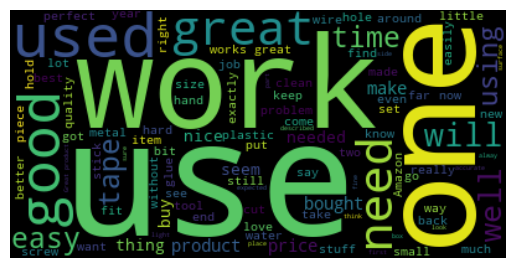

In [13]:
draw_wordcloud(industrial_and_scientific)

# Rating vs Sentiment

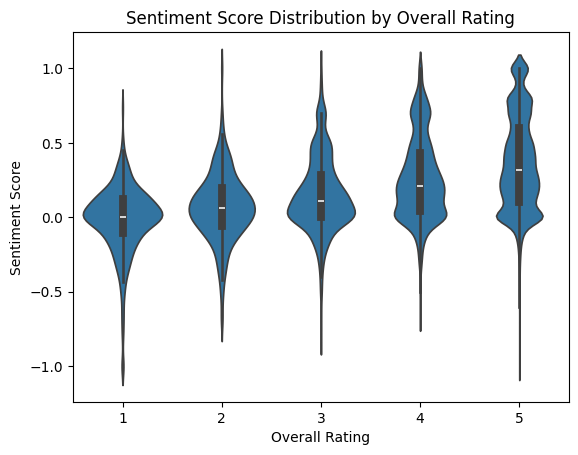

In [14]:
draw_corr(industrial_and_scientific)

# sentiment change over time

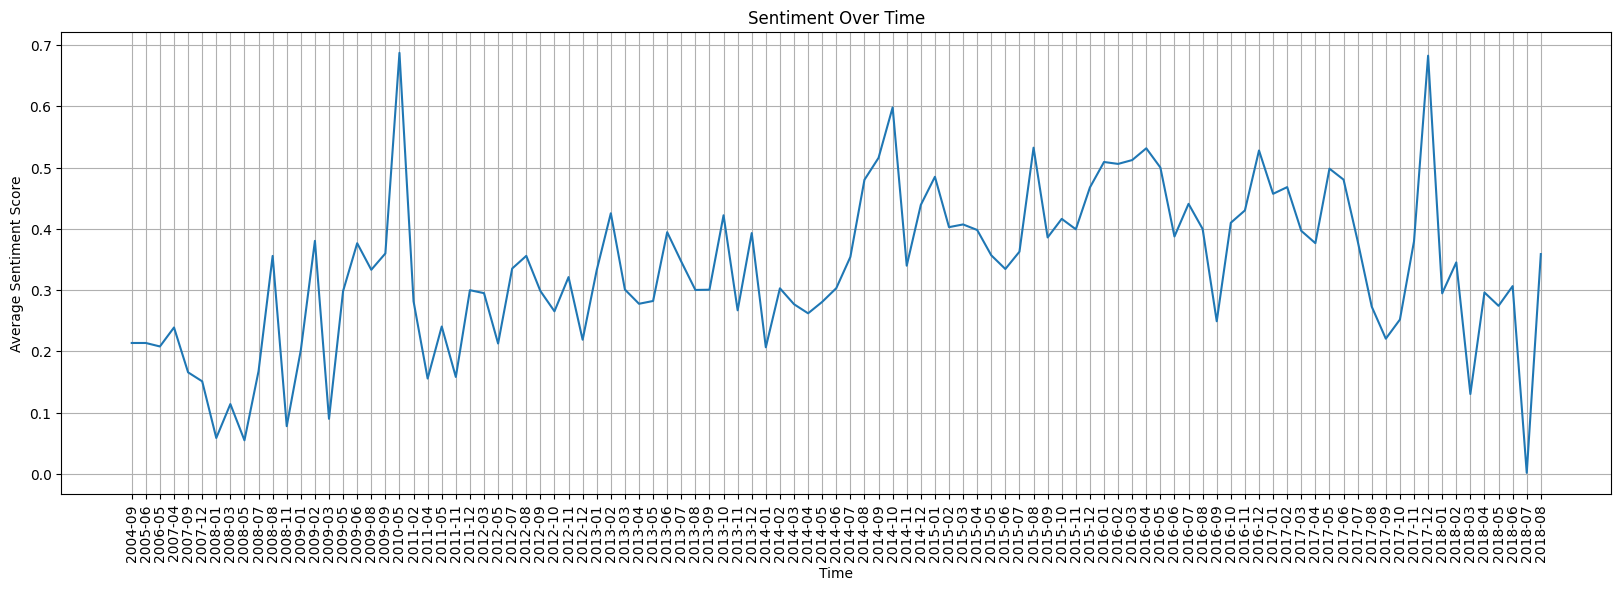

In [ ]:
draw_timeseries(beauty)

In [ ]:
beauty